<a href="https://colab.research.google.com/github/madhavamk/computational-data-science/blob/master/MiniProjects/M6_NB_MiniProject_1_Image_Classification_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Image Classification using Multi Layer Perceptron

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition.

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013.

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

Note that we will be using the images inside the image sections subfolders, containing only the traffic signs.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

## Grading = 10 Points

In [1]:
#@title Download the data
!wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip -qq FullIJCNN2013.zip

### Import Required packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

Data Loading and Feature Extraction (2 points)

#### Get the features and labels of data

* Extract the features of the images within image sections only (do not use images located outside these folders)
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [3]:
classes = {0:'speed limit 20 (prohibitory)',
1:'speed limit 30 (prohibitory)',
2:'speed limit 50 (prohibitory)',
3:'speed limit 60 (prohibitory)',
4:'speed limit 70 (prohibitory)',
5:'speed limit 80 (prohibitory)',
6:'restriction ends 80 (other)',
7:'speed limit 100 (prohibitory)',
8:'speed limit 120 (prohibitory)',
9:'no overtaking (prohibitory)',
10:'no overtaking (trucks) (prohibitory)',
11:'priority at next intersection (danger)',
12:'priority road (other)',
13:'give way (other)',
14:'stop (other)',
15:'no traffic both ways (prohibitory)',
16:'no trucks (prohibitory)',
17:'no entry (other)',
18:'danger (danger)',
19:'bend left (danger)',
20:'bend right (danger)',
21:'bend (danger)',
22:'uneven road (danger)',
23:'slippery road (danger)',
24:'road narrows (danger)',
25:'construction (danger)',
26:'traffic signal (danger)',
27:'pedestrian crossing (danger)',
28:'school crossing (danger)',
29:'cycles crossing (danger)',
30:'snow (danger)',
31:'animals (danger)',
32:'restriction ends (other)',
33:'go right (mandatory)',
34:'go left (mandatory)',
35:'go straight (mandatory)',
36:'go right or straight (mandatory)',
37:'go left or straight (mandatory)',
38:'keep right (mandatory)',
39:'keep left (mandatory)',
40:'roundabout (mandatory)',
41:'restriction ends (overtaking) (other)',
42:'restriction ends (overtaking (trucks)) (other)'}

In [31]:
# YOUR CODE HERE
def load_data_extract_features(data_path):
    images = []
    labels = []
    features = []
    check_done = {}
    for path in glob.iglob('/content/FullIJCNN2013/*/*.ppm', recursive=True):
        if path.split('/')[3] in check_done:
            check_done[path.split('/')[3]] += 1
        else:
            check_done[path.split('/')[3]] = 1
            images.append(Image.open(path))
        img = Image.open(path)
        img = img.resize((30, 30))
        img = np.array(img)
        img = img.flatten()
        features.append(img)
        labels.append(int(path.split('/')[3]))

    return images, features, labels, check_done

images, features, labels, data_distribution = load_data_extract_features('/content/FullIJCNN2013/')

In [12]:
for path in glob.iglob('/content/FullIJCNN2013/**/*.ppm', recursive=True):
  print(path)

/content/FullIJCNN2013/00284.ppm
/content/FullIJCNN2013/00770.ppm
/content/FullIJCNN2013/00677.ppm
/content/FullIJCNN2013/00728.ppm
/content/FullIJCNN2013/00305.ppm
/content/FullIJCNN2013/00526.ppm
/content/FullIJCNN2013/00496.ppm
/content/FullIJCNN2013/00309.ppm
/content/FullIJCNN2013/00325.ppm
/content/FullIJCNN2013/00505.ppm
/content/FullIJCNN2013/00020.ppm
/content/FullIJCNN2013/00210.ppm
/content/FullIJCNN2013/00700.ppm
/content/FullIJCNN2013/00096.ppm
/content/FullIJCNN2013/00892.ppm
/content/FullIJCNN2013/00462.ppm
/content/FullIJCNN2013/00779.ppm
/content/FullIJCNN2013/00240.ppm
/content/FullIJCNN2013/00898.ppm
/content/FullIJCNN2013/00661.ppm
/content/FullIJCNN2013/00414.ppm
/content/FullIJCNN2013/00352.ppm
/content/FullIJCNN2013/00469.ppm
/content/FullIJCNN2013/00392.ppm
/content/FullIJCNN2013/00746.ppm
/content/FullIJCNN2013/00576.ppm
/content/FullIJCNN2013/00681.ppm
/content/FullIJCNN2013/00212.ppm
/content/FullIJCNN2013/00410.ppm
/content/FullIJCNN2013/00635.ppm
/content/F

### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

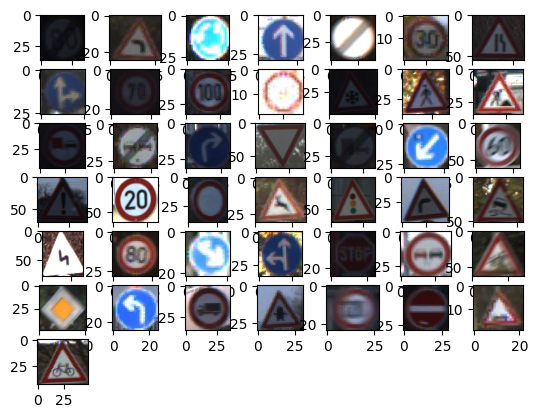

In [32]:
# YOUR CODE HERE
for i,image in enumerate(images):
    plt.subplot(7, 7, i+1)
    plt.imshow(image)
plt.show()




#### Plot the distribution of Classes

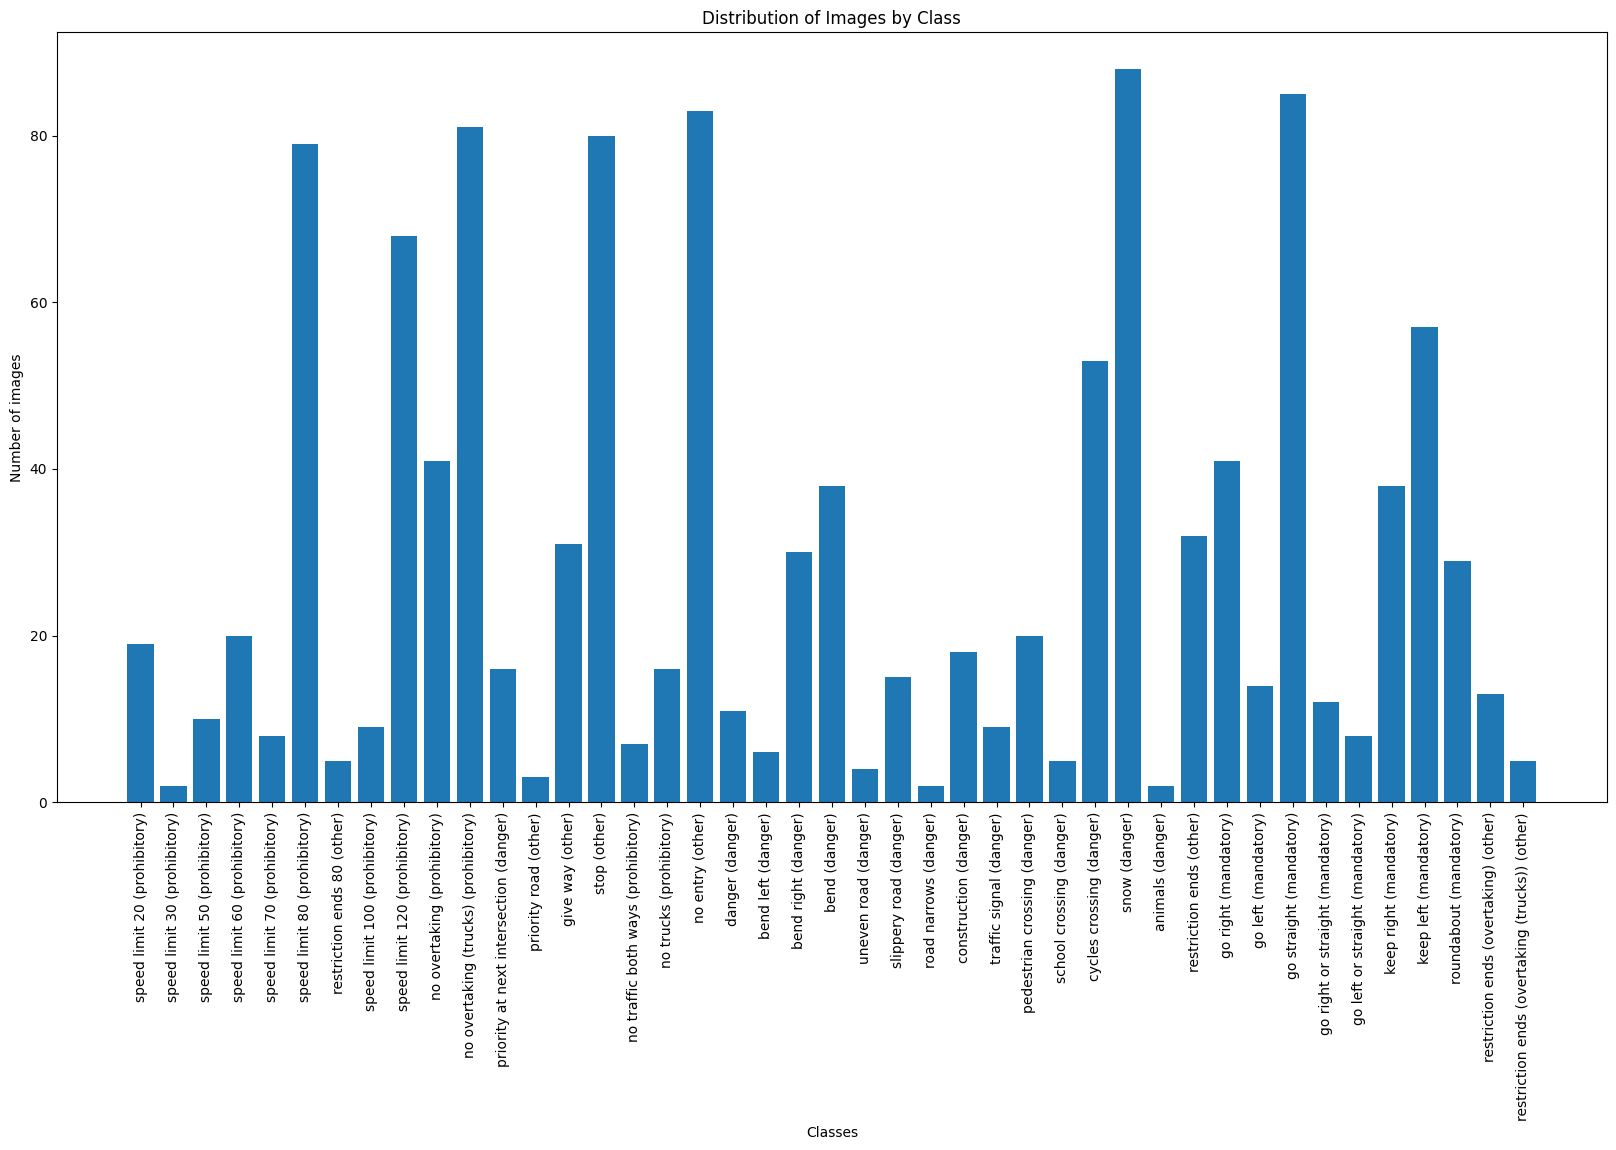

In [33]:
# YOUR CODE HERE
plt.figure(figsize=(20, 10))
plt.bar(classes.values(), data_distribution.values())
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.title('Distribution of Images by Class')
plt.xticks(rotation=90)
plt.show()

#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [34]:
# YOUR CODE HERE
normalized_feature = preprocessing.normalize(features)

In [35]:
normalized_feature

array([[0.00830837, 0.00738521, 0.00923152, ..., 0.00830837, 0.00830837,
        0.01107782],
       [0.01108773, 0.01187971, 0.01346368, ..., 0.01029575, 0.00950377,
        0.01029575],
       [0.01917165, 0.0180439 , 0.0140968 , ..., 0.01071357, 0.00845808,
        0.00789421],
       ...,
       [0.02690772, 0.02690772, 0.02690772, ..., 0.02690772, 0.02690772,
        0.02690772],
       [0.01281135, 0.01120993, 0.01024908, ..., 0.02241986, 0.01697503,
        0.0156939 ],
       [0.00950427, 0.00801923, 0.00653418, ..., 0.01336538, 0.01039529,
        0.00920726]])

### Train the MLP classifier on features (1 point)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

In [55]:
# YOUR CODE HERE
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(normalized_feature, labels, test_size=0.2, random_state=42)
model = MLPClassifier(activation='relu',hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
# accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
class_report = metrics.classification_report(y_test, y_pred)
print(class_report)

Accuracy: 0.8189300411522634
[[ 0  1  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  2 18 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  1  3]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.70      0.88      0.78        16
           2       0.78      0.90      0.84        20
           3       0.80      0.44      0.57         9
           4       0.93      0.76      0.84        17
           5       0.54      0.70      0.61        10
           6       0.50      1.00      0.67         1
           7       0.88      0.88      0.88         8
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        21
          11       1.00      0.71      0.83         7
          12       0.88      0.93      0.90        15
          13       0.95      1.00      0.97        18
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [59]:
X_train.shape, X_test.shape, len(y_train), len(y_test)

((34, 2700), (9, 2700), 34, 9)

### Tune the hyper-parameters (2 points)

* Use the GridSearchCV or RandomizedSearchCV and select best parameters

  Hint: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [37]:
# YOUR CODE HERE
mlptuned = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42, solver='adam', activation='relu')
mlptuned.fit(X_train, y_train)
y_pred = mlptuned.predict(X_test)
accuracy = mlptuned.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8189300411522634


#### Try the different algorithms and compare the results with MLP classifier

In [40]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
def model_predict_evaluate(X_train, X_test, y_train, y_test):
    classification_models = [
        MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42, solver='adam', activation='relu'),
        LogisticRegression(max_iter=1000),
        DecisionTreeClassifier(splitter='random'),
        RandomForestClassifier(n_estimators=5, random_state=42, max_features="sqrt"),
    ]
    scores = []
    best_model = None
    best_score = 0
    for model in classification_models:
        model.fit(X_train, y_train)
        score = f1_score(y_test, model.predict(X_test), average='weighted')
        model_name = type(model).__name__
        scores.append((model_name,round(score,4)))
        if best_model is None or best_score < score:
            best_model = model
            best_score = score
    # Make it pretty
    scores_df = pd.DataFrame(scores,columns=['Classifier','f1-Score'])
    scores_df.sort_values(by='f1-Score',axis=0,ascending=False)
    return scores_df, best_model

scores_df, best_model = model_predict_evaluate(X_train, X_test, y_train, y_test)
print("Best model is ",type(best_model).__name__)

Best model is  MLPClassifier


In [41]:
scores_df

,Classifier,f1-Score
0,MLPClassifier,0.8114
1,LogisticRegression,0.3841
2,DecisionTreeClassifier,0.5394
3,RandomForestClassifier,0.5576


### Implement simple Neural Networks using keras (3 points)

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [43]:
print(tf.__version__)

2.17.0


In [44]:
# Step 1 - Build the architecture
# YOUR CODE HERE
model = tf.keras.Sequential([keras.layers.Dense(100, activation='relu', input_dim=X_train.shape[1]), # Input Layer
                             keras.layers.Dense(50, activation='relu'), # Hidden Layer
                             keras.layers.Dense(43, activation='softmax')]) # Output Layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
# Step 2 - Compile the model
# YOUR CODE HERE
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
# Step 3 - Fit and Evaluate the model
# YOUR CODE HERE
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = np.array(y_train).astype('float32')
y_test = np.array(y_test).astype('float32')
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0499 - loss: 3.7263 - val_accuracy: 0.0905 - val_loss: 3.5939
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1583 - loss: 3.4715 - val_accuracy: 0.1564 - val_loss: 3.3844
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1662 - loss: 3.3035 - val_accuracy: 0.2058 - val_loss: 3.2322
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2341 - loss: 3.1499 - val_accuracy: 0.2634 - val_loss: 3.1091
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2734 - loss: 2.9817 - val_accuracy: 0.3045 - val_loss: 2.9326
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3143 - loss: 2.8132 - val_accuracy: 0.2922 - val_loss: 2.7826
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3167 - loss: 2.6663 - val_accuracy: 0.2798 - val_loss: 2.6622
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3708 - loss: 2.4600 - val_accuracy: 0.2798 - val_loss

#### Try the same parameters used for MLP Classifier and build the keras model

In [52]:
# YOUR CODE HERE
model = tf.keras.Sequential([keras.layers.Dense(100, activation='relu', input_dim=X_train.shape[1]), # Input Layer
                             keras.layers.Dense(43, activation='softmax')]) # Output Layer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.0983 - loss: 3.6351 - val_accuracy: 0.1317 - val_loss: 3.3526
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1282 - loss: 3.3151 - val_accuracy: 0.1687 - val_loss: 3.2628
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2155 - loss: 3.1932 - val_accuracy: 0.2510 - val_loss: 3.1758
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2751 - loss: 3.0666 - val_accuracy: 0.2593 - val_loss: 3.0933
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3177 - loss: 2.9230 - val_accuracy: 0.2757 - val_loss: 2.9862
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3052 - loss: 2.8145 - val_accuracy: 0.3169 - val_loss: 2.8746
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3268 - loss: 2.7327 - val_accuracy: 0.3251 - val_loss: 2.7685
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3629 - loss: 2.6410 - val_accuracy: 0.3786 - val_los

#### Experiment using Dropout, Regularization and Batch Normalization

In [51]:
# YOUR CODE HERE
model = tf.keras.Sequential([keras.layers.Dense(100, activation='relu', input_dim=X_train.shape[1],\
                                                kernel_regularizer = keras.regularizers.l2(0.0001)), # Input Layer
                             keras.layers.Dropout(0.2),
                             keras.layers.BatchNormalization(),
                             keras.layers.Dense(43, activation='softmax')]) # Output Layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1370 - loss: 3.5474 - val_accuracy: 0.3333 - val_loss: 3.6595
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4760 - loss: 2.3993 - val_accuracy: 0.3416 - val_loss: 3.5248
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5818 - loss: 1.8975 - val_accuracy: 0.3868 - val_loss: 3.3775
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6615 - loss: 1.5449 - val_accuracy: 0.4403 - val_loss: 3.2435
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6846 - loss: 1.4073 - val_accuracy: 0.4774 - val_loss: 3.1137
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7572 - loss: 1.1761 - val_accuracy: 0.4733 - val_loss: 2.9849
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7822 - loss: 1.0318 - val_accuracy: 0.5021 - val_loss: 2.8371
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7945 - loss: 0.9494 - val_accuracy: 0.5720 - val_lo

### Report Analysis

* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification, owing to similar appearing traffic signs, if any.
* Comment on the performance of the MLP Classifier
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy
* Report on training time vs convergence

Reference: J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.